In [66]:
import pandas as pd
import numpy as np


df = pd.read_csv("housing_price_dataset.csv")
df.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


## Converting Square Feets to Square Meters

In [67]:
df["SquareMeter"] = df["SquareFeet"] * 0.0929

df["SquareMeter"]


0        197.5054
1        228.4411
2        172.7940
3        213.1126
4        197.8770
           ...   
49995    119.0978
49996    265.1366
49997    276.7491
49998    241.1684
49999    146.0388
Name: SquareMeter, Length: 50000, dtype: float64

In [68]:
df.drop(["SquareFeet"], axis=1, inplace=True)
df.head()

,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,SquareMeter
0,4,1,Rural,1969,215355.283618,197.5054
1,3,2,Rural,1980,195014.221626,228.4411
2,2,1,Suburb,1970,306891.012076,172.7940
3,2,1,Urban,1996,206786.787153,213.1126
4,5,2,Suburb,2001,272436.239065,197.8770


## Data Exploration

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bedrooms      50000 non-null  int64  
 1   Bathrooms     50000 non-null  int64  
 2   Neighborhood  50000 non-null  object 
 3   YearBuilt     50000 non-null  int64  
 4   Price         50000 non-null  float64
 5   SquareMeter   50000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.3+ MB


In [70]:
df.describe()

,Bedrooms,Bathrooms,YearBuilt,Price,SquareMeter
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.498700,1.995420,1985.404420,224827.325151,186.392208
std,1.116326,0.815851,20.719377,76141.842966,53.465180
min,2.000000,1.000000,1950.000000,-36588.165397,92.900000
25%,3.000000,1.000000,1967.000000,169955.860225,140.557700
50%,3.000000,2.000000,1985.000000,225052.141166,186.450300
75%,4.000000,3.000000,2003.000000,279373.630052,232.807400
max,5.000000,3.000000,2021.000000,492195.259972,278.607100


## A little bit of feature extraction

In [71]:
df["total_rooms"] = df["Bedrooms"] + df["Bathrooms"]
df.drop(["Bathrooms", "Bedrooms"], axis=1, inplace=True)
df.head()

,Neighborhood,YearBuilt,Price,SquareMeter,total_rooms
0,Rural,1969,215355.283618,197.5054,5
1,Rural,1980,195014.221626,228.4411,5
2,Suburb,1970,306891.012076,172.7940,3
3,Urban,1996,206786.787153,213.1126,3
4,Suburb,2001,272436.239065,197.8770,7


array([[<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'SquareMeter'}>,
        <Axes: title={'center': 'total_rooms'}>]], dtype=object)

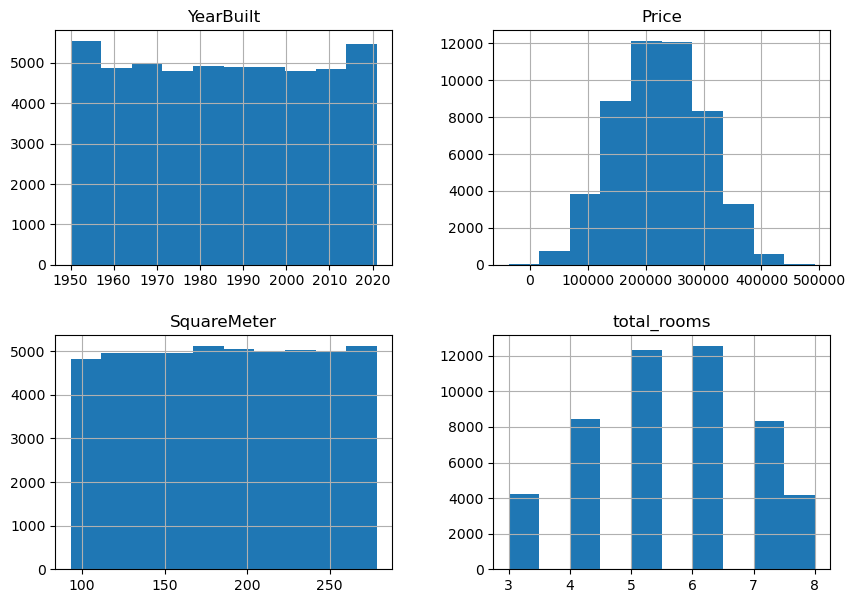

In [72]:
df.hist(figsize=(10, 7))


In [73]:
df["SquareMeter"].value_counts()

SquareMeter
230.9494    43
176.2313    41
273.6834    40
239.0317    40
129.8742    40
            ..
94.6651     12
151.8915    12
216.4570    12
193.8823    11
169.8212    10
Name: count, Length: 2000, dtype: int64

In [74]:
df['SquareMeter'].max()

278.6071

<Axes: >

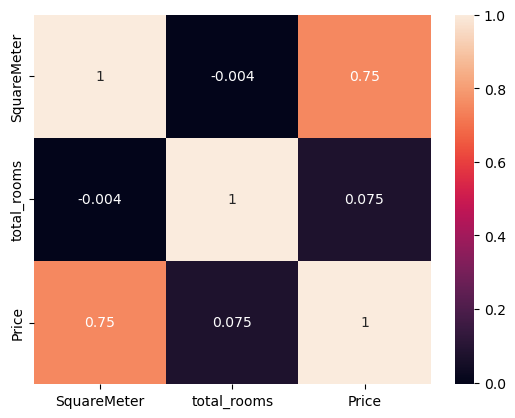

In [75]:
import seaborn as sns
sns.heatmap(df[["SquareMeter", "total_rooms", "Price"]].corr(),annot=True)

## Clearly, The area of the house is the factor that affects the price the most

In [76]:
df.head()
#neighborhood, total_rooms => robust
#rest => min_max

,Neighborhood,YearBuilt,Price,SquareMeter,total_rooms
0,Rural,1969,215355.283618,197.5054,5
1,Rural,1980,195014.221626,228.4411,5
2,Suburb,1970,306891.012076,172.7940,3
3,Urban,1996,206786.787153,213.1126,3
4,Suburb,2001,272436.239065,197.8770,7


## Encoding the categorical column, and scalling the numerical ones

In [77]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split


## encoding the Neighborhood Column 
df=pd.get_dummies(df,columns=['Neighborhood'],drop_first=True,dtype=int)
df.head()

x_ = df.drop(["Price"], axis=1)
y_ = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=42)


MM = MinMaxScaler()
RS = RobustScaler()


x_train[["total_rooms"]] = MM.fit_transform(x_train[["total_rooms"]])
x_test[[ "total_rooms"]] = MM.transform(x_test[["total_rooms"]] )



x_train[["YearBuilt", "SquareMeter"]] = RS.fit_transform(x_train[["YearBuilt", "SquareMeter"]])
x_test[["YearBuilt", "SquareMeter"]] = RS.transform(x_test[["YearBuilt", "SquareMeter"]])

## some features are normally distributed, which may affect our model in a bad way

array([[<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'SquareMeter'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'Neighborhood_Suburb'}>],
       [<Axes: title={'center': 'Neighborhood_Urban'}>, <Axes: >]],
      dtype=object)

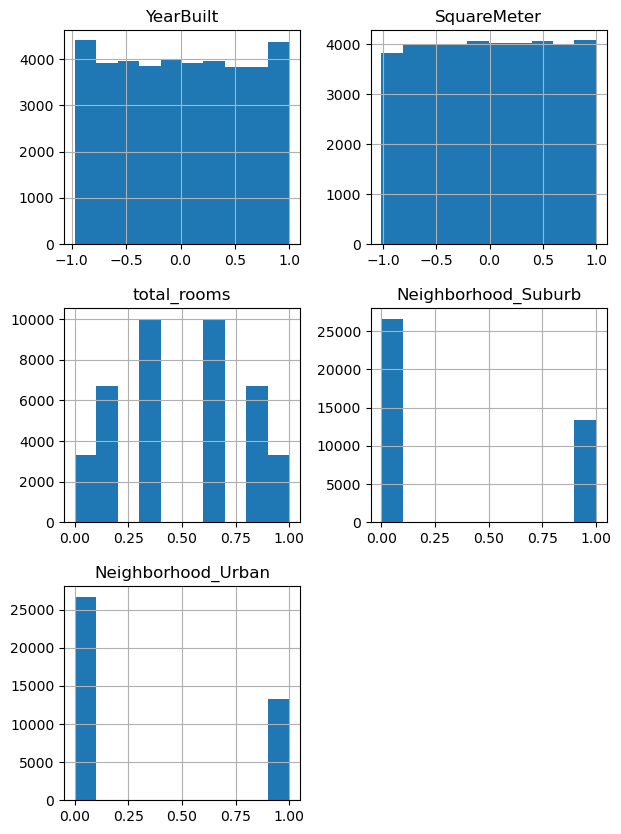

In [78]:
x_train.hist(figsize=(7, 10))

<Axes: >

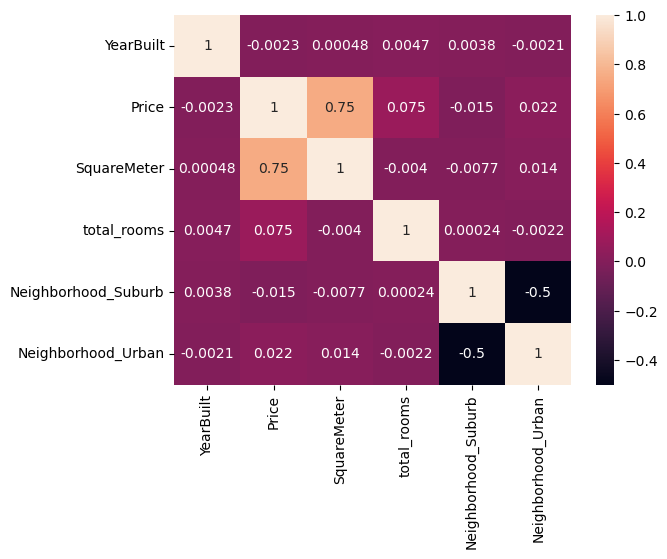

In [79]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

## Trying Different Models with grid search

In [80]:
x_train_ = x_train.values
x_test_ = x_test.values
y_train_ = y_train.values
y_test_ = y_test.values
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(x_train_, y_train_)
predictions = LR.predict(x_test_)

from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test_, predictions)
R2 = r2_score(y_test, predictions)

print(MSE)
print(R2)


2438188228.4800506
0.5752250802908476


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV




param_grid = [{'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 5, 8]},
              {'bootstrap': [False], 'n_estimators':[3, 10, 30], 'max_features':[2,3,4]}]

RF_REGRESSOR = RandomForestRegressor()
grid_search = GridSearchCV(RF_REGRESSOR, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(x_train, y_train)





GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 5, 8],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='r2')

In [82]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 50}

In [83]:
grid_search.best_score_

0.4983386303223716

In [84]:

param_grid2 = [{'n_neighbors':[10, 15, 20, 25, 30, 35]}]

KNN = KNeighborsRegressor()
grid_search2 = GridSearchCV(KNN, param_grid2, cv=5, scoring='r2', return_train_score=True)
grid_search2.fit(x_train_, y_train_)



GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [10, 15, 20, 25, 30, 35]}],
             return_train_score=True, scoring='r2')

In [85]:
grid_search2.best_params_


{'n_neighbors': 35}

In [86]:
grid_search2.best_score_


0.5544364670925851

# training a KNN Model with the correlated data only


In [88]:
x_train_2 = x_train[["SquareMeter", "Neighborhood_Suburb", "Neighborhood_Urban"]].values

param_grid3 = [{'n_neighbors':[10, 15, 20, 25, 30, 35, 40]}]

KNN = KNeighborsRegressor()
grid_search3 = GridSearchCV(KNN, param_grid2, cv=5, scoring='r2', return_train_score=True)
grid_search3.fit(x_train_2, y_train_)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [10, 15, 20, 25, 30, 35]}],
             return_train_score=True, scoring='r2')

In [90]:
grid_search3.best_params_


{'n_neighbors': 35}

In [92]:
grid_search3.best_score_


0.5487285479211126